Поработаем над предсказанием погоды. Будем использовать датасет weather.csv, ПЕРВЫЕ 75% (shuffle = False) возьмем для обучения, последние 25% - для тестирования.

Построим 4 модели которые будут предсказывать целевую переменную <b>RainTomorrow</b> с помощью:

   1. логистической регрессии [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)
   
   2. метода ближайших соседей [sklearn.neighbors](https://scikit-learn.org/stable/modules/neighbors.html)
 
   3. Байесовского классификатора [sklearn.naive_bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)
   
   4. логистической регрессии реализованной самостоятельно

Затем сравним результаты моделей (по качеству и времени выполнения) и сделаем вывод о том, какая модель и с какими параметрами даёт лучшие результаты.


Краткое описание данных:

    Date - Дата наблюдений
    Location - Название локации, в которой расположена метеорологическая станция
    MinTemp - Минимальная температура в градусах цельсия
    MaxTemp - Максимальная температура в градусах цельсия
    Rainfall - Количество осадков, зафиксированных за день в мм
    Evaporation - Так называемое "pan evaporation" класса А (мм) за 24 часа до 9 утра
    Sunshine - Число солнечных часов за день
    WindGustDir - направление самого сильного порыва ветра за последние 24 часа
    WindGustSpeed - скорость (км / ч) самого сильного порыва ветра за последние 24 часа
    WindDir9am - направление ветра в 9 утра

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import time
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

In [ ]:
url = "https://github.com/OlegusOfficial/ML/blob/main/weather.csv?raw=true"
X = pd.read_csv(url, index_col=0)

In [ ]:
y = X.RainTomorrow.replace({'No':0, 'Yes': 1})

In [ ]:
del X['RainTomorrow']

### Логистическая регрессия

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

#заменим текстовую фичу RainToday на 0, 1
X = X.replace({'RainToday' :{'No': 0, 'Yes': 1}})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10, shuffle=False)

In [ ]:
X_train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0


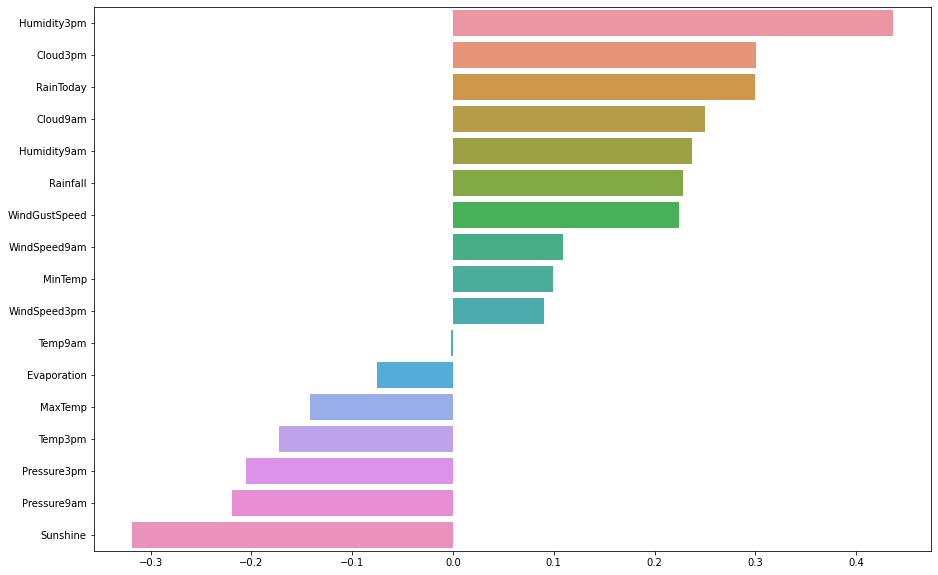

In [ ]:
numeric_data = X_train.select_dtypes([np.number])

numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns
X_train = X_train.fillna(numeric_data_mean)
X_test = X_test.fillna(numeric_data_mean)

correlations = X_train[numeric_features].corrwith(y_train).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

In [ ]:
logistic_model = LogisticRegression(solver='lbfgs', random_state=10)

In [ ]:
logistic_model.fit(X_train[numeric_features], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predicted_y = logistic_model.predict(X_test[numeric_features])

In [ ]:
print(f'accuracy: {round(logistic_model.score(X_test[numeric_features], y_test), 2)}')

accuracy: 0.84


### Метод k-ближайших соседей

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# это будет долго!
accuracy = []
for n_neighbors in range(1, 50, 3):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train[numeric_features], y_train)
    accuracy.append( np.mean(model.predict(X_test[numeric_features]) == y_test))

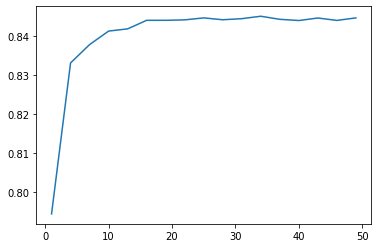

In [ ]:
plt.plot(range(1, 50, 3), accuracy)

Результат с 15-ю соседями дает ту же точность, что и на 50

In [ ]:
model = KNeighborsClassifier(n_neighbors=15)
model.fit(X_train[numeric_features], y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [ ]:
print(f'accuracy: {round(model.score(X_test[numeric_features], y_test), 2)}')

accuracy: 0.84


### Байесовский классификатор

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [ ]:
bayes_model_g = GaussianNB()

In [ ]:
bayes_model_g.fit(X_train[numeric_features], y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
print(f'accuracy: {round(bayes_model_g.score(X_test[numeric_features], y_test), 2)}')

accuracy: 0.8


In [ ]:
bayes_model_b = BernoulliNB()

In [ ]:
bayes_model_b.fit(X_train[numeric_features], y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
print(f'accuracy: {round(bayes_model_b.score(X_test[numeric_features], y_test), 2)}')

accuracy: 0.76


### Реализация логистической регрессии
__Логистическая регрессия__

$$p(y|x) = a(x, \theta) = \sigma(\langle x, \theta \rangle) = \frac{1}{1 + \exp(-\langle \theta, x_i \rangle)}$$

In [ ]:
theta = np.array([1, 2, 3])

X =  np.array([[ 1,  1, 1],
               [-1, -2, 1],
               [-1, -2, 2],
               [-2, -2, -3]
              ])

y = np.array([1, 1, 0, 0])

In [ ]:
np.dot(X, theta)

array([  6,  -2,   1, -15])

In [ ]:
def probability(theta, X):
    result = 1.0 / (1 + np.exp(-np.dot(X, theta)))
    return result
prob = probability(theta, X)


assert type(prob) == np.ndarray, 'Возвращается неверный тип'
assert prob.shape == (X.shape[0],), 'Неверный размер массива'
assert (prob.round(3) == [0.998, 0.119, 0.731, 0.]).all(), 'Функция считается неверно'

Функция предсказания метки класса, получает на вход вероятности принадлежности к классу 1 и выдает метки классов $y \in \{0, 1\}$

In [ ]:
prob =  probability(theta, X)
result = np.where(prob > 0.5, 1, 0)
result

array([1, 0, 1, 0])

In [ ]:
def binary_class_prediction(theta, X, threshold =.5):
    prob =  probability(theta, X)
    result = np.where(prob > threshold, 1, 0)
    return result

y_pred = binary_class_prediction(theta, X)


assert type(y_pred) == np.ndarray, 'Возвращается неверный тип'
assert y_pred.shape == (X.shape[0],), 'Неверный размер массива'
assert min(y_pred) == 0, 'Функция считается неверно'
assert max(y_pred) == 1, 'Функция считается неверно'

__Функционал качества логистической регрессии__

Запишем правдободовие выборки для меток класса $y \in \{+1, -1\}$ 

$$Likelihood(a, X^\ell) = \prod_{i = 1}^{\ell} a(x_i,\theta)^{[y_i = +1]} (1 - a(x_i, \theta))^{[y_i = -1]} → \operatorname*{max}_{\theta}$$ 

Прологарифмируем правдоподобие выборки и перейдем к задаче минимизации:

$$Q(a, X^\ell) =     -\sum_{i = 1}^{\ell} 
        [y_i = +1] \log a(x_i, \theta)
        +
        [y_i = -1] \log (1 - a(x_i, \theta)) \to \operatorname*{min}_{\theta}$$ 
        
Подставим $a(x, \theta)$ в функцинал качества:

$$ Q(a, X^\ell) = -\sum_{i = 1}^{\ell} \left(
    [y_i = +1]
    \log \frac{1}{1 + \exp(-\langle \theta, x_i \rangle)}
    +
    [y_i = -1]
    \log \frac{\exp(-\langle \theta, x_i \rangle)}{1 + \exp(-\langle \theta, x_i \rangle)}
\right)
=\\
=
-\sum_{i = 1}^{\ell} \left(
    [y_i = +1]
    \log \frac{1}{1 + \exp(-\langle \theta, x_i \rangle)}
    +
    [y_i = -1]
    \log \frac{1}{1 + \exp(\langle \theta, x_i \rangle)}
\right)
=\\
=
\sum_{i = 1}^{\ell}
    \log \left(
        1 + \exp(-y_i \langle \theta, x_i \rangle)
    \right) $$
    

Итоговый оптимизируемый функционал качества (logloss), записанный для меток классов $y \in \{+1, -1\}$ и усредненный по выборке

$$Q(a, X^{\ell}) = \frac{1}{\ell}\sum_{i = 1}^{\ell}
    \log \left(
        1 + \exp(-y_i \langle \theta, x_i \rangle)
        \right)
   \to \operatorname*{min}_{\theta}$$

Реализуем его в функции logloss:

In [ ]:
def logloss(theta, X, y): 
    y_revised = np.where(y == 0, -1, 1)
    result = np.sum(np.log(1 + np.exp(-y_revised * np.dot(X, theta)))) / np.shape(y)[0]
    return result

In [ ]:
assert logloss(theta, X, y).round(3) == 0.861, 'Функция считается неверно'

__Алгоритм оптимизации функционала качества. Стохастический градиентный спуск__

<b>Вход: </b> Выборка $X^\ell$, темп обучения $h$

<b>Выход: </b> оптимальный вектор весов $\theta$

1.  Инициализировать веса $\theta$
2.  Инициализировать оценку функционала качества: $Q(a, X^\ell)$
3.  <b>Повторять</b>: 

    Выбрать случайным образом подвыборку объектов $X^{batch} =\{x_1, \dots,x_n \}$ из $X^{\ell}$
    
    Рассчитать градиент функционала качества: $\nabla Q(X^{batch}, \theta)$
    
    Обновить веса: $\theta := \theta - h\cdot \nabla Q(X^{batch}, \theta)$
       
    <b>Пока</b> значение $Q$ и/или веса $\theta$ не сойдутся   

Реализуем функцию рассчета градиента функционала качества

$$\frac{\partial Q(a, X^{batch}) }{\partial \theta_j} =  \frac{\partial \frac{1}{n}\sum_{i = 1}^{n} \log \left( 1 + \exp(- y_i \langle \theta, x_i \rangle) \right)} {\partial \theta_j} =\frac{1}{n}\sum_{i = 1}^{n} \frac {1}{ 1 + \exp(- y_i \langle \theta, x_i \rangle)} \cdot \exp(- y_i \langle \theta, x_i \rangle) \cdot -y_i x_{ij}$$

Реализуем рассчет градиента в матричном виде:

In [ ]:
y_revised = np.where(y == 0, -1, 1)
np.sum(-y_revised * X.T, axis=1)

array([-3, -3, -3])

In [ ]:
def gradient(theta, X, y):
    y_revised = np.where(y == 0, -1, 1)
    expr = np.exp(-y_revised * np.dot(X, theta))
    result = np.sum(1.0 / (1 + expr) * expr * (-y_revised * X.T), axis=1) / np.shape(y)[0]
    return result 

assert gradient(theta, X, y).shape == theta.shape, 'Неверный размер массива'

Функция обучения



In [ ]:
def fit(X, y, batch_size=10, h=0.05,  iters=100, plot=True):

    # получаем размерности матрицы
    size, dim = X.shape

    # случайная начальная инициализация
    theta = np.random.uniform(size=dim)
    
    errors = []
    
    theta_history = theta
    colors = [plt.get_cmap('gist_rainbow')(i) for i in np.linspace(0,1,dim)]
    
    # plt 
    if plot:
        fig = plt.figure(figsize=(15, 10))
        ax1 = fig.add_subplot(221)
        ax2 = fig.add_subplot(222)
        ax3 = fig.add_subplot(212)
        fig.suptitle('Gradient descent')
        
        
    for _ in range(iters):  
        
        # берём случайный набор элементов
        batch = np.random.choice(size, batch_size, replace=False)
        X_batch = X[batch]
        y_batch = y[batch]

        # считаем производные
        grad = gradient(theta, X_batch, y_batch)
        
        assert type(grad) == np.ndarray, 'неверный тип'
        assert len(grad.shape) == 1, 'Необходимо вернуть одномерный вектор'
        assert grad.shape[0] == len(theta), 'длина вектора должна быть равной количеству весов'
        
        
        # Обновляем веса
        
        theta -= grad * h
        
        theta_history = np.vstack((theta_history, theta))
        
        # error
        loss = logloss(theta, X, y)
        errors.append(loss)
        
        if plot:
            ax1.clear()            
            ax1.scatter(range(dim), theta, label='Gradient solution')
            ax1.legend(loc="upper left")
            ax1.set_title('theta')
            ax1.set_ylabel(r'$\bar \beta$')
            ax1.set_xlabel('weight ID')
            
            
            ax2.plot(range(_+1), errors, 'g-')
            ax2.set_title('logloss')
            ax2.set_xlabel('itarations')
            
            ax3.plot(theta_history)
            ax3.set_title('update theta')
            ax3.set_ylabel('value')
            ax3.set_xlabel('itarations')
            time.sleep(0.05)
            fig.canvas.draw()   
            
    return theta

In [ ]:
X, y = make_classification(n_samples=2000)

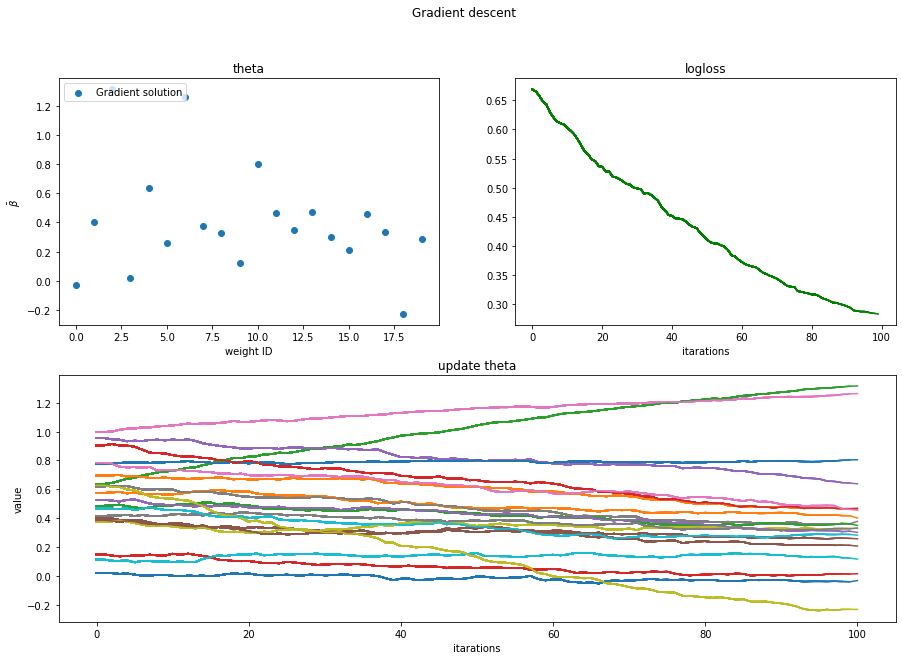

In [ ]:
optimal_theta = fit(X, y)

In [ ]:
y_pred = binary_class_prediction(optimal_theta, X)

In [ ]:
accuracy = np.mean(y_pred == y)
print(f'accuracy: {round(accuracy, 2)}')

accuracy: 0.89


### Выводы

Проанализировав данный датасет, я сделал вывод, что большинство признаков - числовые, также сделал простейший перевод одного важного категориального признака(RainToday) в числовой. Далее работал только с числовыми признаками.

Построил модель на основе Logistic Regression, она хороша для бинарной классификации и на нашем датасете дала точность 84%, пользовался встроенными настройками sklearn, для нашей задачи выбрал алгоритм оптимизации 'lbfgs', имеющий l2 регуляризацию.
Далее была построена модель k-соседей. Найден наименьший k, который дает наилучшую точность. Этот алгоритм самый тяжеловесный, особенно при поиске оптимального k. Получилась такая же точность что и в Логистической регрессии, 84%.
Далее, построил байесовский классификатор на основе метода Гаусса и Бернулли. Результаты получились хуже, чем в предыдущих методах.
В конце реализовал Логистическую регрессию с помощью матричных операций, на нашем сгенерированном пространстве он дал точность 89%.
